In [3]:
import sys
import os
sys.path.append(os.path.abspath("../"))
from pclib import train_model, run_inference
from pclib.visualization import plot_point_cloud
import numpy as np

In [4]:
dataset_path = "../data/"
dataset_categories = ["chair", "table"]



# Data Handling

In [19]:
from pclib.datasets import load_dataset
import pclib.datasets.data_transforms as transforms

In [20]:
dataset = load_dataset(dataset_path, 
                       dataset_categories, 
                       dataset_type="transform", 
                       phase="train")
dataset

In [21]:
Ts = [
    transforms.AffineTransfor3D(method="random"),
    transforms.Normalize(),
    transforms.DownSample(method="voxel", voxel_size=[0.1, 0.1, 0.1]),
    transforms.UniformSizedEmbedding(method="random", n_points=1000)
]

In [22]:
dataset.set_transforms(transforms)

In [23]:
data, label = dataset[43]
data.shape # will always return same shaped data

TypeError: 'module' object is not iterable

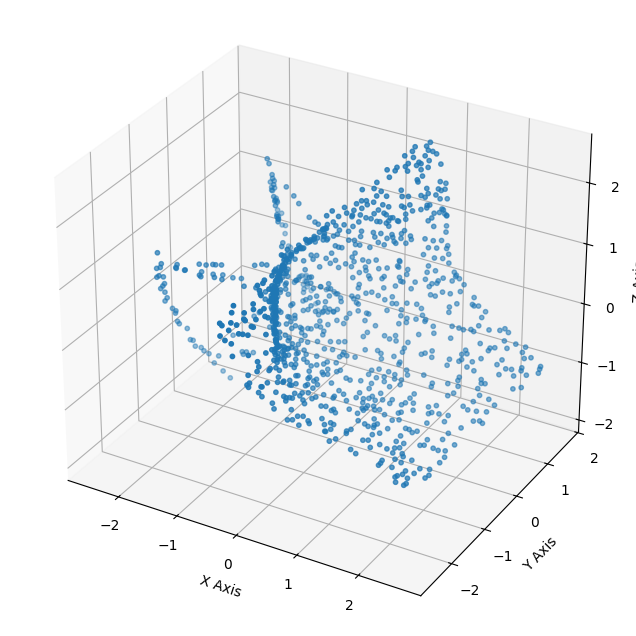

In [10]:
plot_point_cloud(data)

# Train model

In [15]:
trained_model = train_model(
    dataset=dataset,
    model_type="baseline",
)

  0%|          | 0/1481 [00:00<?, ?it/s]

ValueError: too many values to unpack (expected 2)

In [14]:
type(trained_model)

pclib.models.baseline.BaselineModel

# Run inference

In [11]:
dataset = load_dataset(
    dataset_path, 
    dataset_categories, 
    dataset_type="transforms_dataset", 
    phase="eval"
)

In [12]:
dataset.set_transforms(transforms)

In [13]:
dataset[0]

array([[-0.47257716, -1.5181123 ,  0.29802325],
       [-1.39378704, -1.00867076,  1.43963287],
       [ 0.28637272, -0.70046475,  0.61316146],
       ...,
       [-1.08211528,  1.3923977 , -0.81750445],
       [ 0.31252139, -0.17919326, -1.39513621],
       [-0.35173864, -0.63605248,  0.71180581]], shape=(1000, 3))

In [14]:
predictions = run_inference(
    dataset_path=dataset_path,
    dataset_categories=dataset_categories,
    model=trained_model,
)

NameError: name 'trained_model' is not defined

In [21]:
trained_model._frequencies

{'chair': 0.6677920324105334, 'table': 0.3322079675894666}

In [18]:
predictions[:10]

['chair',
 'chair',
 'chair',
 'chair',
 'table',
 'table',
 'chair',
 'table',
 'chair',
 'table']

In [20]:
dataset._file_paths

[('../data/chair/chair_0900.ply', 'chair'),
 ('../data/chair/chair_0914.ply', 'chair'),
 ('../data/chair/chair_0082.ply', 'chair'),
 ('../data/chair/chair_0928.ply', 'chair'),
 ('../data/chair/chair_0096.ply', 'chair'),
 ('../data/chair/chair_0069.ply', 'chair'),
 ('../data/chair/chair_0041.ply', 'chair'),
 ('../data/chair/chair_0727.ply', 'chair'),
 ('../data/chair/chair_0733.ply', 'chair'),
 ('../data/chair/chair_0055.ply', 'chair'),
 ('../data/chair/chair_0280.ply', 'chair'),
 ('../data/chair/chair_0294.ply', 'chair'),
 ('../data/chair/chair_0519.ply', 'chair'),
 ('../data/chair/chair_0525.ply', 'chair'),
 ('../data/chair/chair_0243.ply', 'chair'),
 ('../data/chair/chair_0257.ply', 'chair'),
 ('../data/chair/chair_0531.ply', 'chair'),
 ('../data/chair/chair_0492.ply', 'chair'),
 ('../data/chair/chair_0486.ply', 'chair'),
 ('../data/chair/chair_0479.ply', 'chair'),
 ('../data/chair/chair_0451.ply', 'chair'),
 ('../data/chair/chair_0337.ply', 'chair'),
 ('../data/chair/chair_0323.ply'